# Módulo Básico - Projeto Final - Análise Exploratória de Dados com Python


In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [98]:
# importando a base inicial
# Iremos trabalhar com a base do Titanic que já estamos trabalhando em todas as aulas


#df = pd.read_csv(r'E:\Users\quadr\Documents\Projetos\PA-Analytics\Python Básico para Data Science e Analytics\Curso\V2.0\Bases\Módulo Básico\Projeto Final//train.csv')
df = pd.read_csv(r'/workspaces/pythonDataScienceDrExcel/Base de Dados/Aula 3 e 4/train.csv')


In [99]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1 - Entendendo os tipos de variáveis que temos na base

In [100]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [101]:
# Criando duas listas com nomes das colunas, uma para colunas qualitativas e outra para quantitativas

quali = []
quanti = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        quali.append(i)
    else:
        quanti.append(i)


In [103]:
print('Lista Quanti: ',quanti)
print('Lista Quali: ',quali)

Lista Quanti:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Lista Quali:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


## 2 - Estatística Descritiva e Tabelas de Frequência

In [102]:
quanti

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [104]:
# Vamos criar um dataframe para as variáveis quanti para fazermos estatística descritiva

df_quanti = df[quanti]

In [105]:
df_quanti

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [ ]:
# Estatística Descritiva

df_quanti.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [106]:
# Calculando Mediana que não está no comando anterior

df_quanti.median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [107]:
# Tabela de frequência para  as variáveis qualitativas
# Criando o df_quali

df_quali = df[quali]

# Fazendo a tabela de frequência para a variável Sex
# usado coluna Name, porque queremos a contagem de uma coluna qualquer, e a Name é a que possui valor preechido em todas as linhas
# se retirar o Name, irá dar a contagem para cada coluna
df_quali.groupby('Sex').Name.count()

Sex
female    314
male      577
Name: Name, dtype: int64

In [108]:
# Fazendo todas as tabelas de frequência de uma vez só para todas as variáveis

# Vamos desconsiderar a variável Name que sempre será única para cada passageiro

for i in df_quali.columns:
    if i == 'Name':
        pass
    else:
        print('----------------------')
        print('Variável: ',i)
        print(df_quali.groupby(i).Name.count())
        print('----------------------')

----------------------
Variável:  Sex
Sex
female    314
male      577
Name: Name, dtype: int64
----------------------
----------------------
Variável:  Ticket
Ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Name: Name, Length: 681, dtype: int64
----------------------
----------------------
Variável:  Cabin
Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Name: Name, Length: 147, dtype: int64
----------------------
----------------------
Variável:  Embarked
Embarked
C    168
Q     77
S    644
Name: Name, dtype: int64
----------------------


## 3 - Detecção de Dados Nulos

In [109]:
# Para cada variável no DF, iremos pegar a quantidade de dados nulos

# Iremos visualizar quantos nulos temos em cada variável
# Vamos criar uma tabela para visualizar isso (um Data Frame)

nulos = pd.DataFrame() #criando dataframe vazio
nulos['Variável'] = df.columns #criando coluna chamada Variável


In [110]:
nulos

,Variável
0,PassengerId
1,Survived
2,Pclass
3,Name
4,Sex
5,Age
6,SibSp
7,Parch
8,Ticket
9,Fare


In [111]:
# Vamos colocar na outra coluna, a quantidade de nulos no DF

nulos['Quantidade'] = pd.Series() #inserindo o daframe nulo uma coluna vazia chamada quantidade
nulos ['Porcentagem'] = pd.Series() #inserindo o daframe nulo uma coluna vazia chamada porcentagem

# para cada linha do dataframe nulos, pegará o nome da variável e somará a quantidade de nulos e o percentual
for i in nulos.index:
    nulos.Quantidade[i] = df[nulos['Variável'][i]].isna().sum()
    nulos.Porcentagem[i] = (df[nulos['Variável'][i]].isna().sum()/df.PassengerId.count())*100

/tmp/ipykernel_2199/4091641694.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  nulos.Quantidade[i] = df[nulos['Variável'][i]].isna().sum()
/tmp/ipykernel_2199/4091641694.py:9: FutureWarning: ChainedAssignmentError: behaviour will change 

In [112]:
nulos

,Variável,Quantidade,Porcentagem
0,PassengerId,0,0.0
1,Survived,0,0.0
2,Pclass,0,0.0
3,Name,0,0.0
4,Sex,0,0.0
5,Age,177,19.86532
6,SibSp,0,0.0
7,Parch,0,0.0
8,Ticket,0,0.0
9,Fare,0,0.0


### Qual estratégia usar?

#### Para a variável Cabin, temos muitos dados vazios, se removermos todas as linhas vazias, podemos acabar com um dataframe sem quase nenhuma linha para usar.

#### No caso da Variável Age também temos uma quantidade relevante de vazios (~20%)


#### Apenas na variável Embarked temos poucos vazios (0,22%)


### Faremos o seguinte

#### Removeremos as linhas vazias na variável Embarked
#### Para Age e Cabin iremos preencher

#### Age é quantitativa (podemos usar a média de idade para preencher os vazios)
#### Cabin é qualitativa (podemos usar a moda, cabine que mais se repete para preencher)


In [113]:
# Removendo as linhas da variável Embarked
# criando um novo dataframe df2
# usando metodo dropna para remover as linhas vazias olhando apenas a coluna Embarked

df2 = df.dropna(subset=['Embarked'])

In [114]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [115]:
# Preenchendo a variável Age
# criando dataframe 3, que é cópia do df2
# para idade, iremos usar a média de todas as idades para preencher os vazios na coluna Age, usando o método fillna
df3 = df2.copy()
df3.Age = df2.Age.fillna(df2.Age.mean())

In [117]:
#Verificando os vazios de Age
df3.Age.isna().sum()

0

In [116]:
# Preenchendo a variável Cabin
# usando moda para ver as colunas que mais se repetem

df4 = df3.copy()
print(df4.Cabin.mode())

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object


In [118]:
# Temos mais de uma Moda na variável Cabin (mais de um valor é o que mais se repete)

# Então iremos escolher um valor dentro da moda e preencher aleatoriamente
# criando uma lista para armazenar as cabines que mais se repetem
moda = []
for i in df4.Cabin.mode().values:
    moda.append(i)

In [119]:
# Temos uma lista com os valores da Moda (cabines que mais se repetem)
moda

['B96 B98', 'C23 C25 C27', 'G6']

In [120]:
# Preenchendo com valores aleatórios da moda
# usando o método filna para preencher na df4 as cabines vazias
# usando o random.choice para fazer escolha aleatória dentro da lista moda (gerada acima)

import random

df4.Cabin = df4.Cabin.fillna(random.choice(moda))

In [121]:
# verificando vazios na coluna cabine
df4.Cabin.isna().sum()

0

In [122]:
df4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.642093,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [123]:
print(df4.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


## 4 - Detecção de Outliers

In [126]:
# Usaremos primeiro o boxplot como recurso para detectar outliers.
# outliers são valores que fogem do padrão, ou seja, temos o gráfico que mostra o limite inferior e o limite superior
# e os valores que estiverem foram desse limite são os outliers.

df4.boxplot()

AssertionError: 1

In [ ]:
#plotando vários gráficos em uma mesma figura
fig, axs = plt.subplots(2,3,figsize=(20,10))

In [ ]:
# plotando boxplot para cada variável para ver outliers de cada um
fig, axs = plt.subplots(2,3,figsize=(20,10))

axs[0,0].set_title('Survived')
axs[0,0].boxplot(df4.Survived)

axs[0,1].set_title('Pclass')
axs[0,1].boxplot(df4.Pclass)

axs[0,2].set_title('Age')
axs[0,2].boxplot(df4.Age)

axs[1,0].set_title('SibSp')
axs[1,0].boxplot(df4.SibSp)

axs[1,1].set_title('Parch')
axs[1,1].boxplot(df4.Parch)

axs[1,2].set_title('Fare')
axs[1,2].boxplot(df4.Fare)

{'whiskers': [<matplotlib.lines.Line2D at 0x72795761f7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x72795761fd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x72795761f520>],
 'medians': [<matplotlib.lines.Line2D at 0x72795764c280>],
 'fliers': [<matplotlib.lines.Line2D at 0x72795764c520>],
 'means': []}

### Dependendo da Variável temos uma quantidade muito grande de outliers, por exemplo Parch, Age, Fare

### Vamos estudar estas 3 variáveis calculando qual a % de outliers

In [ ]:
# Calculo dos Outliers

# Todos os pontos que estão fora do limite superior e inferior da amostra

#Q1 e Q3 são os quartis da amostra. Q1 25% dos dados estão abaixo e Q3 75% dos dados estão abaixo do valor
# Limite superior = Q3 + 1,5 * DistanciaInterquartil
# Limite inferior = Q1 - 1,5 * DistanciaInterquartil

# Distância Interquartil = Valor do 3º Quartil - Valor do 1º Quartil (Q3 - Q1)


# Fazendo este cálculo para estas o Dataframe todo (apenas o quantitativo)

df4_quanti = df4[quanti] #criando dataframe para fazer o cálculo, selecionando apenas as colunas quantitativas de df4
colunas = df4_quanti.columns #criando lista com o nome das colunas
outliers = []

# para cada i dentro das colunas do dataframe quantitativo, calcula
# esse primeiro loop é das colunas
for i in df4_quanti.columns:
    
    q3 = np.quantile(df4_quanti[i], 0.75) #pega a coluna i e 0.75 é o terceiro quartil
    q1 = np.quantile(df4_quanti[i], 0.25) #0.25 é o primeiro quartil
    dist = q3 - q1 
    lim_inf = q1 - 1.5*dist
    lim_sup = q3 + 1.5*dist
    
    #usado par dar print no resultado final
    print('--------------')
    print(i)
    print(dist)
    print(lim_inf)
    print(lim_sup)
    print('-------------')

    outlier = 0 # usado para somatório de outliers

    # esse segundo loop é das linhas. ou seja, selecionando a primeira coluna, 
    # irá fazer um loop em cada linha dessa coluna
    # verifica se o valor está acima do limite inferior e limite superior e caso seja, somar outlier + 1
    for j in df4_quanti.index:
        if df4_quanti[i][j] < lim_inf:
            outlier = outlier + 1
        elif df4_quanti[i][j] > lim_sup:
            outlier= outlier + 1
        else: 
            pass #caso não seja, pula

    # após rodar todas as linhas, adiciona o contador outliers para ver quantas linhas são outliers para cada coluna    
    outliers.append(outlier) 
    
df_outlier = pd.DataFrame() #criando um data frame para outliers
df_outlier['Variável'] = colunas
df_outlier['Outliers'] = outliers
df_outlier['Porcentagem'] = (outliers/df4_quanti.PassengerId.count()) * 100

--------------
PassengerId
444.0
-442.0
1334.0
-------------
--------------
Survived
1.0
-1.5
2.5
-------------
--------------
Pclass
1.0
0.5
4.5
-------------
--------------
Age
13.0
2.5
54.5
-------------
--------------
SibSp
1.0
-1.5
2.5
-------------
--------------
Parch
0.0
0.0
0.0
-------------
--------------
Fare
23.1042
-26.7605
65.6563
-------------


In [ ]:
df_outlier

,Variável,Outliers,Porcentagem
0,PassengerId,0,0.000000
1,Survived,0,0.000000
2,Pclass,0,0.000000
3,Age,65,7.311586
4,SibSp,46,5.174353
5,Parch,213,23.959505
6,Fare,114,12.823397


### Nestes casos (Age e SibSp) a quantidade de outliers é pouco influente, poderíamos fazer um drop nestas linhas.

### No caso do Parch e Fare, teríamos que entender se são variáveis que importam muito para resolver o problema, para saber como tratar os outliers (de repente estudando eles separadamente, fazendo um modelo específico segmentando este público)

### Para este problema em especifico vamos manter os outliers apesar de estarem identificados

## 5 - Visualização de Dados

### Vamos tentar entender o que pode influenciar na taxa de sobrevivência da tripulação

In [ ]:
# Quantas pessoas morreram e quantas sobreviveram

sns.countplot(x='Survived', data=df4);


In [ ]:
# Quantas pessoas morreram e sobreviveram , separadas por sexo

df4.groupby(['Survived','Sex'])['Survived'].count()


Survived  Sex   
0         female     81
          male      468
1         female    231
          male      109
Name: Survived, dtype: int64

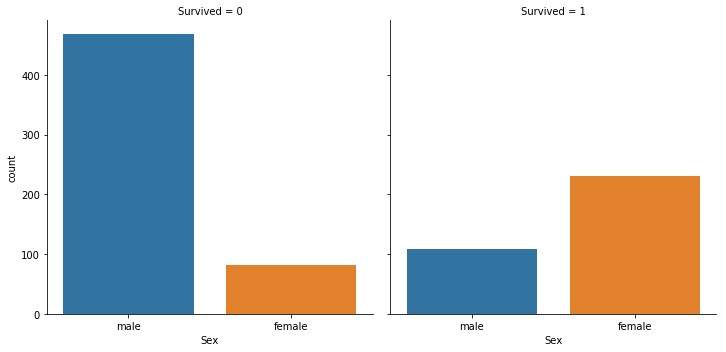

In [ ]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df4);

### Aparentemente Mulheres tem uma melhor taxa de sobrevivência que homens


### ------------------------

### Verificando se a Classe que eles estavam viajando também influencia

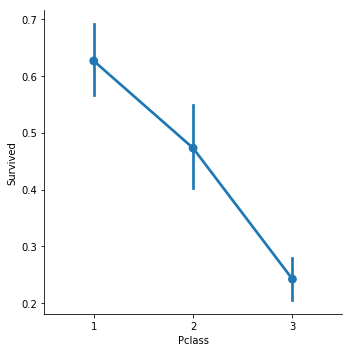

In [ ]:
# verificando sobrevivência por classe do viajante, 1ª, 2ª e 3ª classe
sns.catplot('Pclass','Survived', kind='point', data=df4);

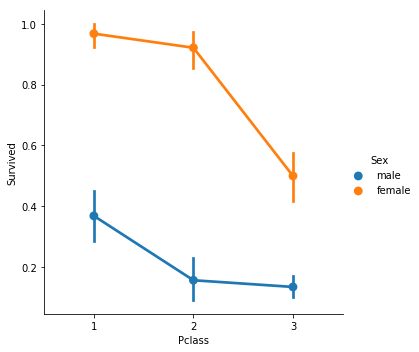

In [ ]:
# verificando sobrevivência por classe do viajante por sexo, 1ª, 2ª e 3ª classe
sns.catplot('Pclass','Survived',hue='Sex', kind='point', data=df4);


### Aparentemente para homens e mulheres, quanto menor a classe que viajavam, mais provável de não sobreviver, no caso das mulheres essa diferença é ainda maior

### Para Embarked 

#### C = Cherbourg, Q = Queenstown, S = Southampton

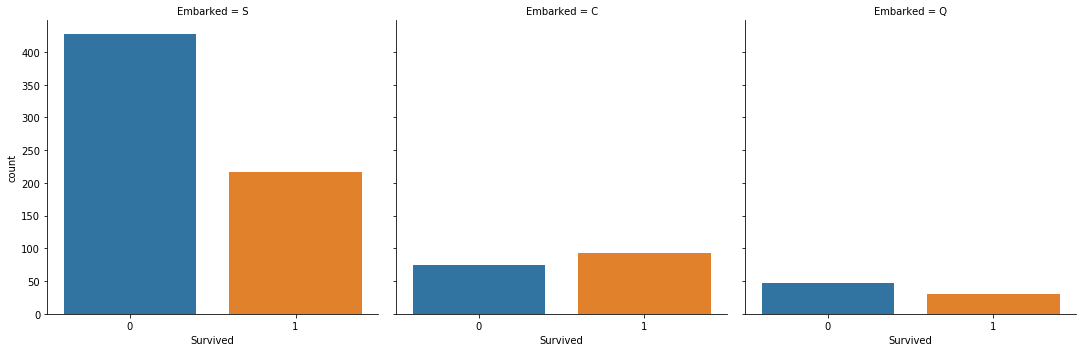

In [ ]:
#pelos portões de embarque
sns.catplot(x='Survived', col='Embarked', kind='count', data=df4);


### Para Age 

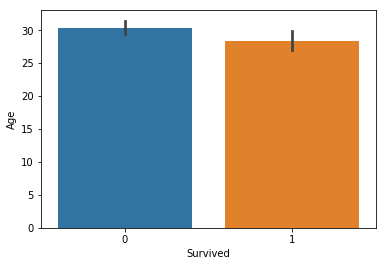

In [ ]:
#separação por idade de quem sobreviveu
sns.barplot(x='Survived', y='Age', data=df4);


### Correlação entre todas as variáveis

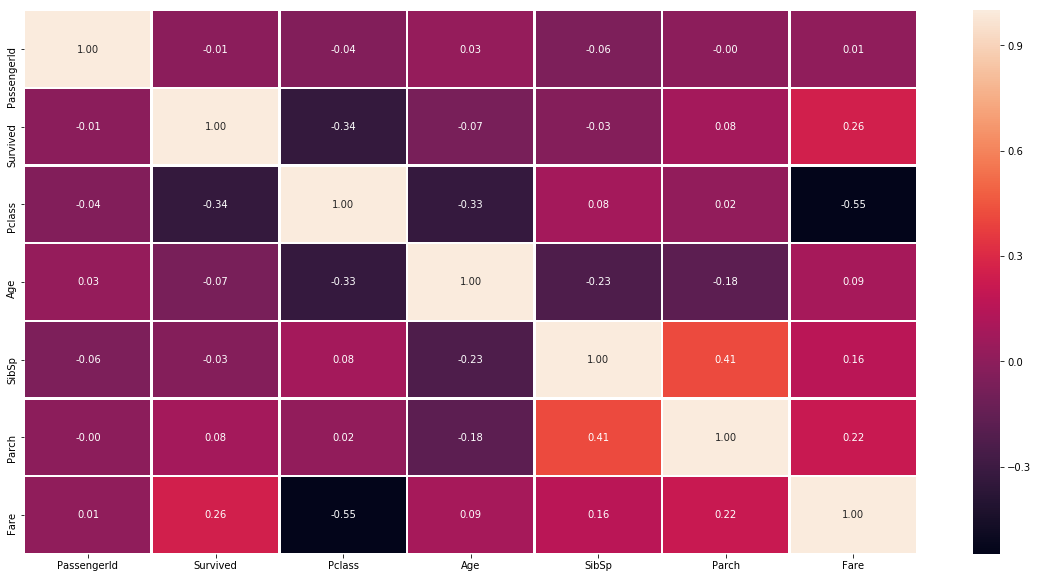

In [ ]:
# verifica a relação entre variáveis.
# por exemplo, survived tem relação inversamente proporcional a Class (-0,34), chegando a conclusão que
# quanto menor a classe maior a chance de sobreviver (1ª classe tende sobreviver)
# outra co-relação é Fare x survived, ou seja, pessoas que pagaram mais tiveram mais chance de sobreviver 
plt.figure(figsize=(20,10))
sns.heatmap(df4.corr(), annot = True, linewidths=1.5 , fmt = '.2f')


# ------------------------------------

# Fim do Notebook